# Hybrid Image

In [1]:
# auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# import hybrid image functions
from hybrid_image import (
    load_image, crop2square, crop2shape,
    gaussian_filter_masks, apply_filter,
)

## Load and resize images

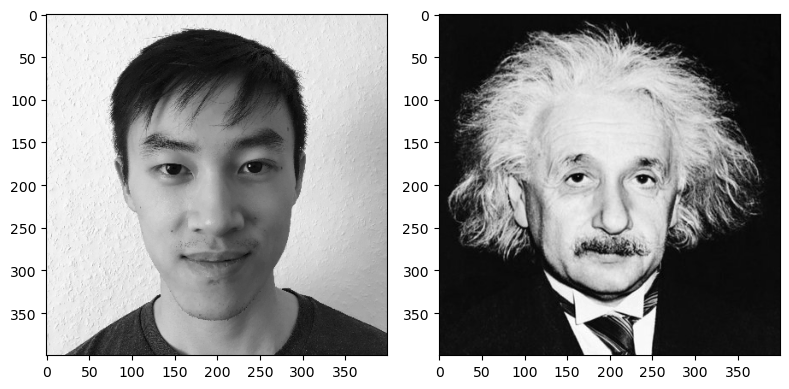

In [3]:
img1_path = "img1.jpg"
img2_path = "einstein.jpg"
img1 = load_image(img1_path)
img2 = load_image(img2_path)

# RESIZE IMAGE 1 TO MATCH IMAGE OF EINSTEIN
# the following steps are done for img1 but should be adjusted for your image

# 1. crop image to square
img1 = crop2square(img1)
# 2. downsample image
m, n = img1.shape
img1 = img1[::m//400, ::n//400]
# 3. crop image to match einstein
img1 = crop2shape(img1, shape=(400, 400), crop_from=('top', 'both'))

if img1.shape != img2.shape:
    raise Exception("Images must be the same size")

# PLOT IMAGES
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.tight_layout()
plt.show()

## Create hybrid images

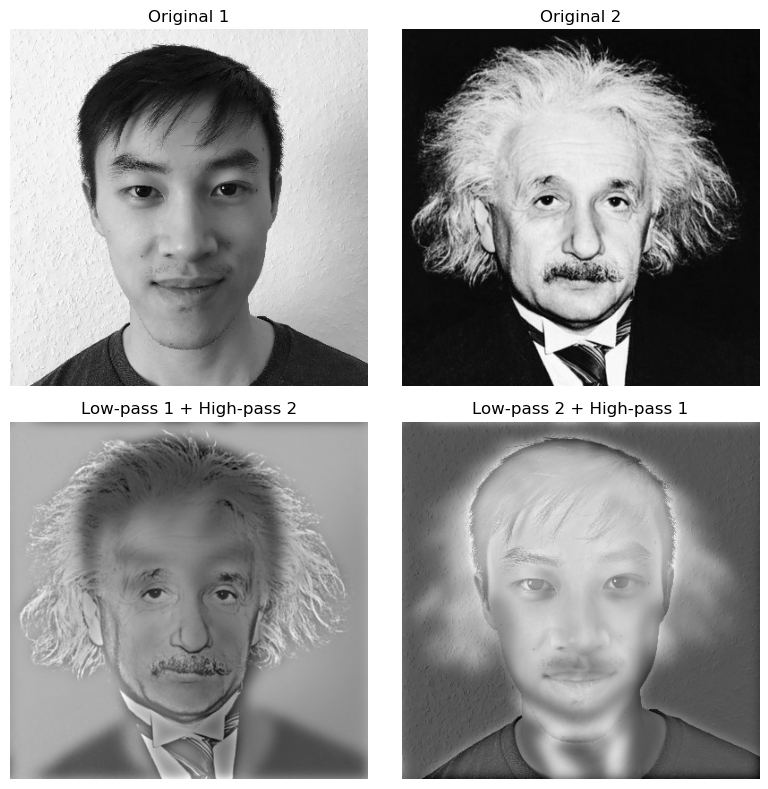

In [4]:
# CREATE FILTER MASKS
std = 10  # standard deviation of Gaussian filter masks
low_pass, high_pass = gaussian_filter_masks(img1.shape, std=std)

# APPLY FILTERS TO IMAGES IN FREQUENCY DOMAIN
img1_low_pass = apply_filter(img1, low_pass)
img2_low_pass = apply_filter(img2, low_pass)
img1_high_pass = apply_filter(img1, high_pass)
img2_high_pass = apply_filter(img2, high_pass)

# PLOT IMAGES
images = [
    img1,
    img2,
    img1_low_pass + img2_high_pass,
    img2_low_pass + img1_high_pass,
]
titles = [
    "Original 1",
    "Original 2",
    "Low-pass 1 + High-pass 2",
    "Low-pass 2 + High-pass 1",
]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))

for ax, img, title in zip(axs.flat, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

fig.tight_layout()
# fig.savefig("hybrid_showcase.jpg")
plt.show()

In [5]:
# # save hybrid image
# plt.imsave("hybrid_image.jpg", images[3], cmap="gray")

### Try different filter masks

In [6]:
hybrid_images = []
s_list = []

s_range = np.linspace(10, 30, 4)
for s1 in s_range:
    for s2 in s_range:
        low_pass_filter, _ = gaussian_filter_masks(img2.shape, s1)
        _, high_pass_filter = gaussian_filter_masks(img1.shape, s2)

        img1_high_pass = apply_filter(img1, high_pass_filter)
        img2_low_pass = apply_filter(img2, low_pass_filter)

        hybrid_images.append(img1_high_pass + img2_low_pass)
        s_list.append((s1, s2))

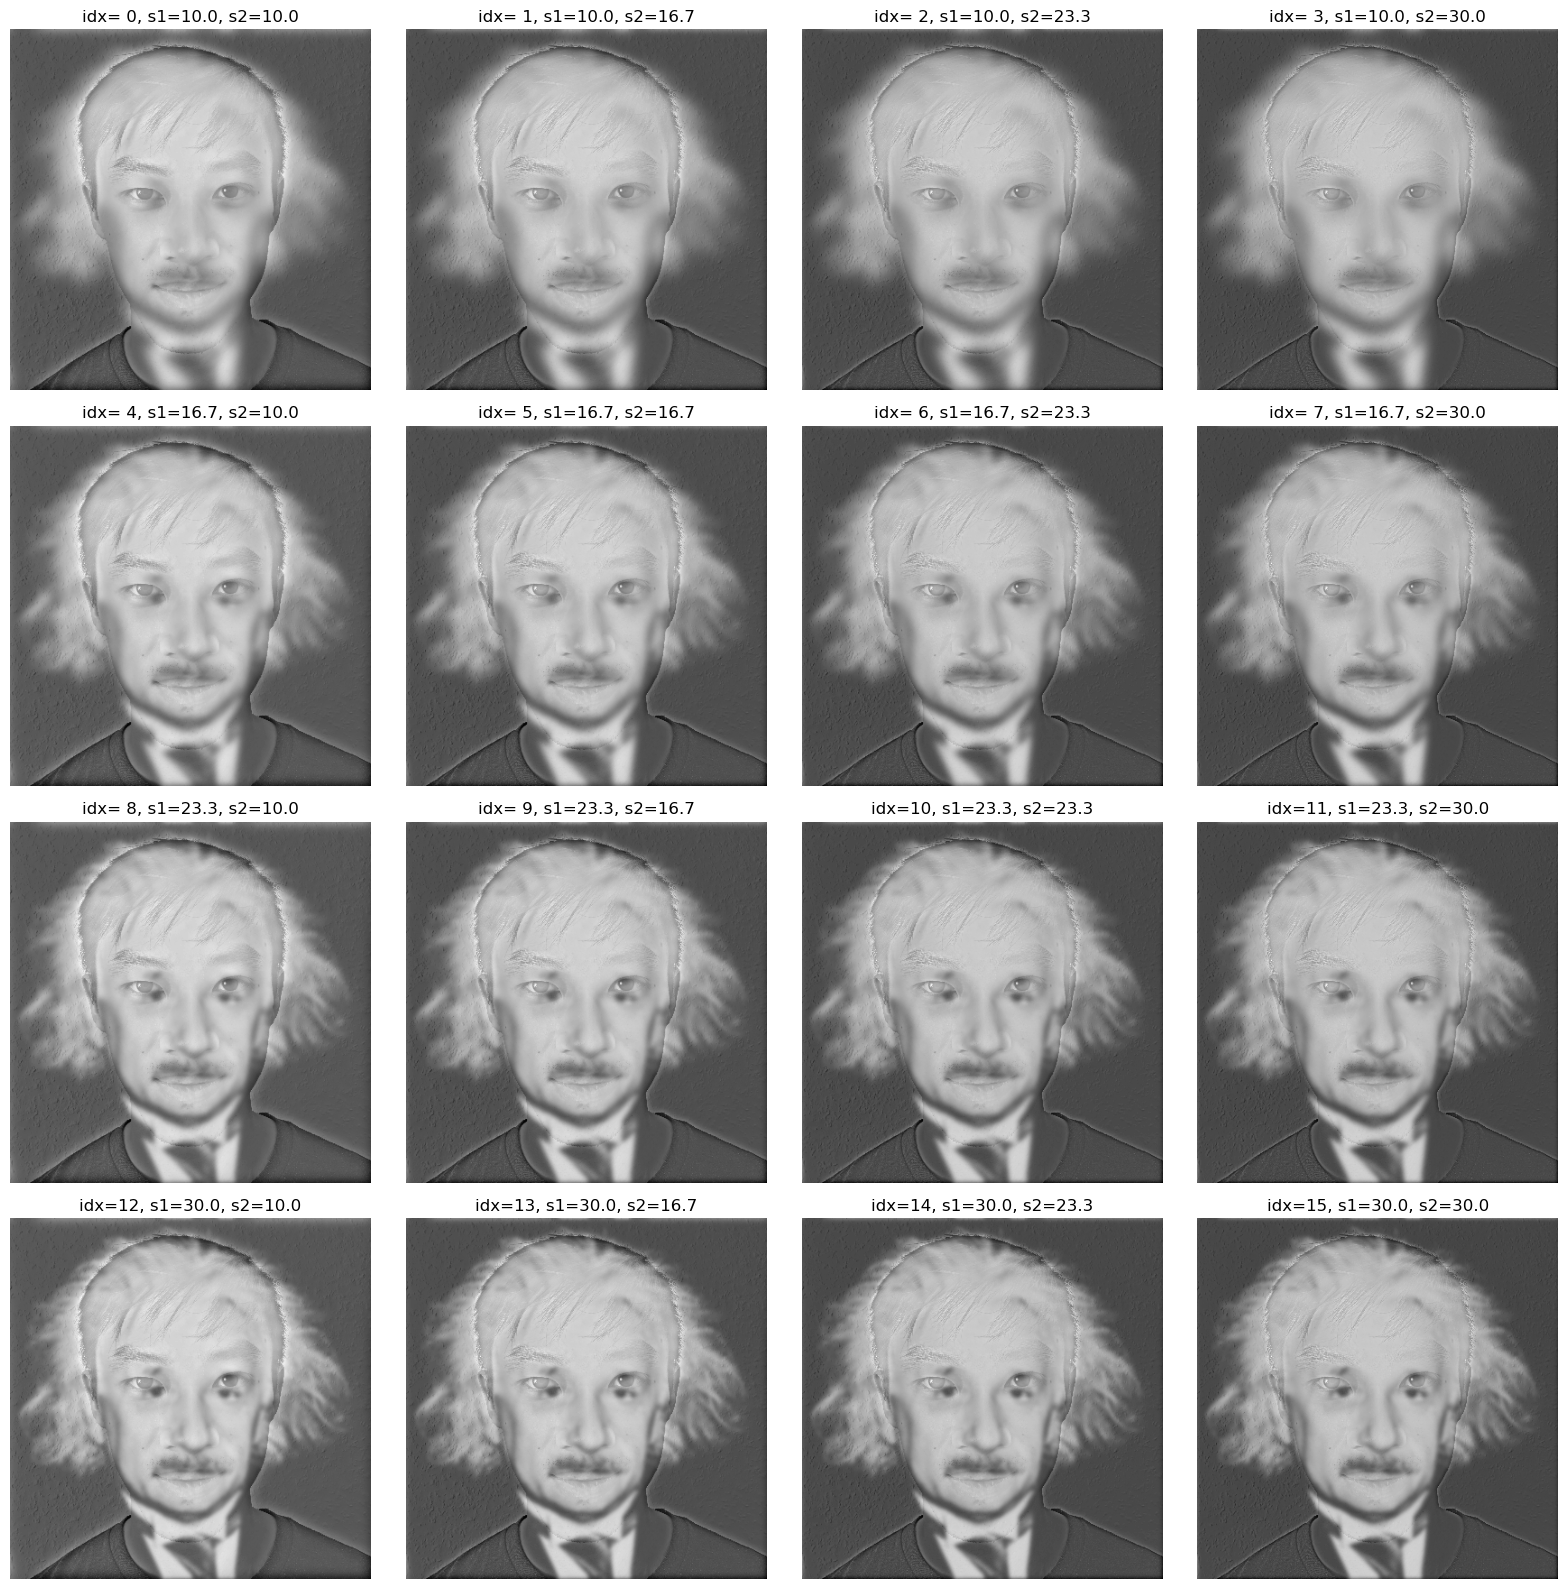

In [7]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(16, 16))

for idx, (ax, (s1, s2), img) in enumerate(zip(axs.flatten(), s_list, hybrid_images)):
    ax.imshow(img, cmap="gray")
    ax.set_title(f"idx={idx:2}, s1={s1:.1f}, s2={s2:.1f}")
    ax.axis("off")

fig.tight_layout()
plt.show()

### Compare the best ones

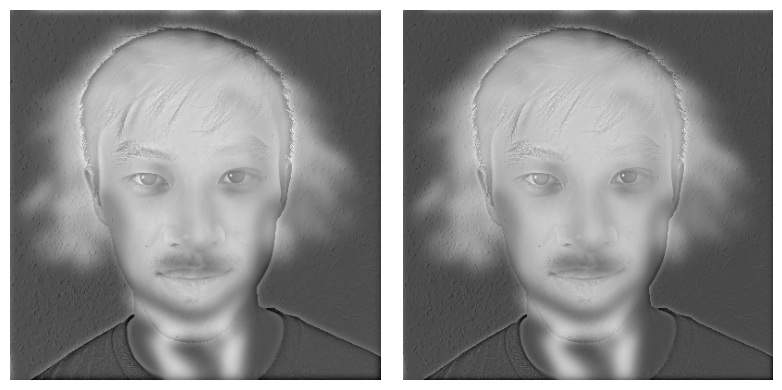

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

ax1.imshow(hybrid_images[1], cmap="gray")
ax1.axis("off")
ax2.imshow(hybrid_images[2], cmap="gray")
ax2.axis("off") 

fig.tight_layout()
plt.show()

In [9]:
# # save best hybrid image
# idx = 1
# plt.imsave("hybrid_image.jpg", hybrid_images[idx], cmap="gray")